# A K-mean implementation in TensorFlow

### Let's generate the data, 2000 points, 2 gaussian clouds clusters:

In [ ]:
import numpy as np

num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
   if np.random.random() > 0.5:
     conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
   else:
     conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

### Visualize the data clouds, using pandas and matplotlib.

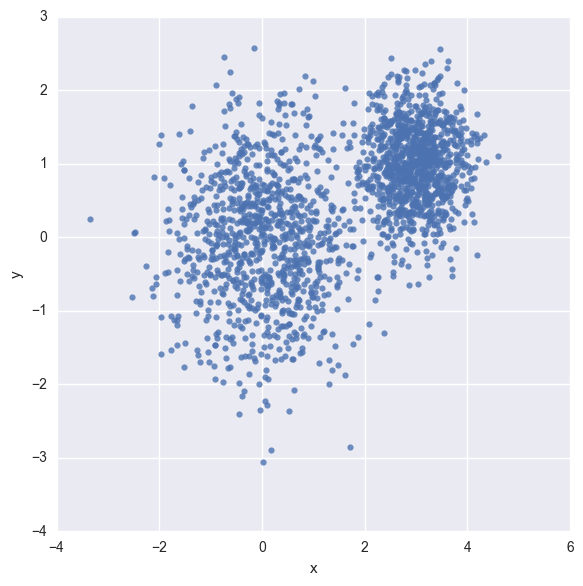

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                   "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

## K-means algorithm in TensorFlow.

### Preparing the data

In [50]:
import tensorflow as tf

# transform our dataset to TF data structure
vectors = tf.constant(conjunto_puntos)
# number of K-clasess
k = 3

# ramdomly get the first 4 points using TF shuffle and slice
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [k, -1]))
print(vectors.get_shape())
print(centroides.get_shape())

(2000, 2)
(3, 2)


### Squared Euclidean Distance

In [51]:
# before the substraction the two tensors need to have the same dimensions
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)
print(expanded_vectors.get_shape()) # 1 means no size assigned yet
print(expanded_centroides.get_shape())

(1, 2000, 2)
(3, 1, 2)


In [52]:
# calculade the euclidean distance
diff = tf.subtract(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
dist = tf.reduce_sum(sqr, 2) # calc. sum on especific dim and reduces the dim.
assignments = tf.argmin(dist, 0) # get index of the min dist on dim. 0
# print shapes
print(diff.get_shape()) 
print(sqr.get_shape())
print(dist.get_shape()) 
print(assignments.get_shape())

(3, 2000, 2)
(3, 2000, 2)
(3, 2000)
(2000,)


### Calculate the new position of center points Ks

In [53]:
means = tf.concat([
  tf.reduce_mean(
      tf.gather(vectors,
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in range(k)], 0)

update_centroids = tf.assign(centroides, means)

print(update_centroids)

Tensor("Assign_3:0", shape=(3, 2), dtype=float32_ref)


## TensorFlow session

In [54]:
# Iniitialize the TF Graph
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)
num_steps = 50

# I terate to get the centers K mean for each point
for step in range(num_steps):
    # execution for each call is in the same order
   _, centroid_values, assignment_values = sess.run([update_centroids,
                                                    centroides,
                                                    assignments])
print(centroides)
print(centroid_values)

Tensor("Variable_7/read:0", shape=(3, 2), dtype=float32)
[[-0.41886389  0.47122627]
 [ 2.96982503  0.98825848]
 [ 0.45734513 -0.69828308]]


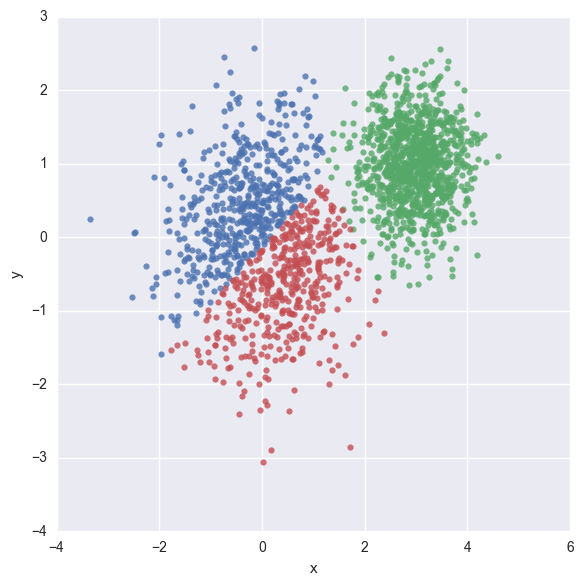

In [55]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
  data["x"].append(conjunto_puntos[i][0])
  data["y"].append(conjunto_puntos[i][1])
  data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df,
           fit_reg=False, size=6,
           hue="cluster", legend=False)
plt.show()